In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import numpy as np
import itertools
from sklearn.preprocessing import Normalizer
import xgboost
%matplotlib inline

In [2]:
data = pd.read_csv("../Data/processed_data.csv")
data.columns

Index(['Unnamed: 0', 'age', 'resting_blood_pressure', 'serum_cholestoral',
       'maximum_heart_rate_achieved',
       'depression_induced_by_exercise_relative_to_rest',
       'number_of_major_vessels', 'target', 'female', 'typical_angina',
       'atypical_angina', 'non_anginal_pain', 'asymptomatic', 'above_120',
       'normal', 'ST_T_abnormality', 'showing_probable',
       'yes_exercise_induced_angina', 'upsloping', 'flat', 'downsloping',
       'normal.1', 'fixed_defect', 'revesable_defect'],
      dtype='object')

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data = shuffle(data)

In [5]:
#scaler = Normalizer()

In [6]:
target = data['target']
data = data.drop("target", axis=1)
print("{}\n{}".format(data.shape, target.shape))

(296, 22)
(296,)


In [7]:
#normalised_df = scaler.fit_transform(data)
#normalised_df = pd.DataFrame(normalised_df, columns=data.columns)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.333, random_state=42)

In [8]:
print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

Train set:  (197, 22) (197,)
Test set:  (99, 22) (99,)


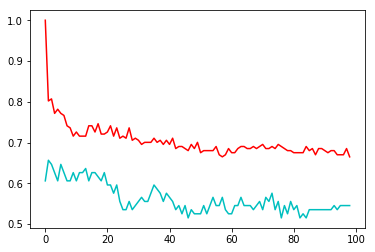

In [10]:
Test_accuracy = []
Train_accuracy = []
for i in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_hat = neigh.predict(x_test)
    Test_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(x_train)))
    Train_accuracy.append(metrics.accuracy_score(y_test, y_hat))
plt.plot(Test_accuracy, color="r")
plt.plot(Train_accuracy, color="c")

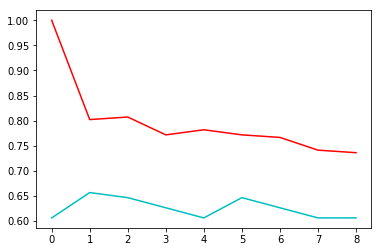

In [11]:
Test_accuracy = []
Train_accuracy = []
for i in range(1, 10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_hat = neigh.predict(x_test)
    Test_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(x_train)))
    Train_accuracy.append(metrics.accuracy_score(y_test, y_hat))
    #cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
    #plot_confusion_matrix(cm, classes=[0, 1])
plt.plot(Test_accuracy, color="r")
plt.plot(Train_accuracy, color="c")

In [12]:
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

LogisticRegression
Train set Accuracy:  0.8781725888324873
Test set Accuracy:  0.8585858585858586
Confusion matrix, without normalization
[[39 12]
 [ 2 46]]


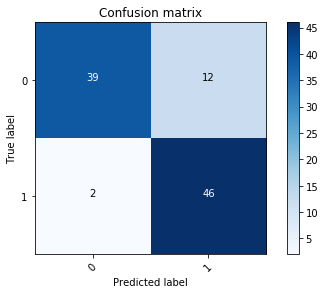

In [13]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
yhat = LR.predict(x_test)
print("LogisticRegression")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

BernoulliNB
Train set Accuracy:  0.8223350253807107
Test set Accuracy:  0.8585858585858586
Confusion matrix, without normalization
[[41 10]
 [ 4 44]]


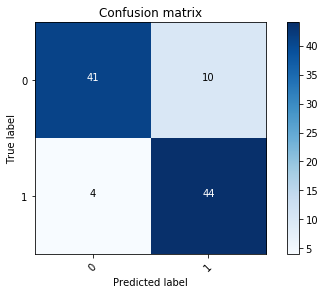

In [14]:
BNB = BernoulliNB()
BNB.fit(x_train,y_train)
yhat = BNB.predict(x_test)
print("BernoulliNB")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, BNB.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

MultinomialNB
Train set Accuracy:  0.8121827411167513
Test set Accuracy:  0.7575757575757576
Confusion matrix, without normalization
[[34 17]
 [ 7 41]]


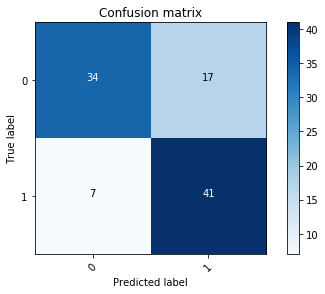

In [15]:
MNB = MultinomialNB()
MNB.fit(x_train,y_train)
yhat = MNB.predict(x_test)
print("MultinomialNB")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, MNB.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

 GaussianNB
Train set Accuracy:  0.8324873096446701
Test set Accuracy:  0.7575757575757576
Confusion matrix, without normalization
[[30 21]
 [ 3 45]]


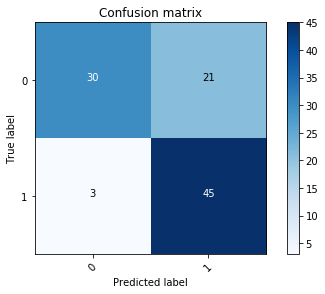

In [17]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
yhat = GNB.predict(x_test)
print(" GaussianNB")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, GNB.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

LinearSVC
Train set Accuracy:  0.8426395939086294
Test set Accuracy:  0.8383838383838383
Confusion matrix, without normalization
[[37 14]
 [ 2 46]]


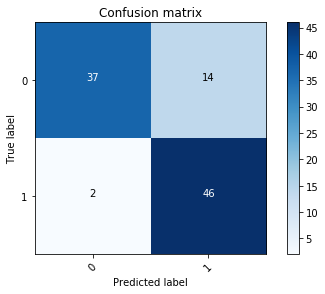

In [18]:
LSVC = LinearSVC()
LSVC.fit(x_train,y_train)
yhat = LSVC.predict(x_test)
print("LinearSVC")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LSVC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

In [18]:
'''
NSVC = NuSVC()
NSVC.fit(x_train, y_train)
yhat = NSVC.predict(x_test)
print("NuSVC")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, NSVC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
#plot_confusion_matrix(cm, classes=[0, 1])
print(cm)
'''

'\nNSVC = NuSVC()\nNSVC.fit(x_train, y_train)\nyhat = NSVC.predict(x_test)\nprint("NuSVC")\nprint("Train set Accuracy: ", metrics.accuracy_score(y_train, NSVC.predict(x_train)))\nprint("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))\ncm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])\n#plot_confusion_matrix(cm, classes=[0, 1])\nprint(cm)\n'

SVC
Train set Accuracy:  1.0
Test set Accuracy:  0.48484848484848486
Confusion matrix, without normalization
[[ 1 50]
 [ 1 47]]


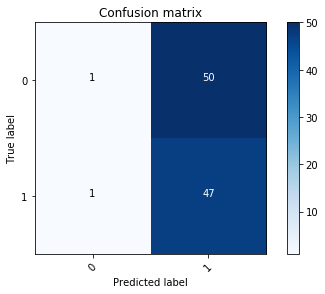

In [19]:
PSVC = SVC()
PSVC.fit(x_train,y_train)
yhat = PSVC.predict(x_test)
print("SVC")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, PSVC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

AdaBoostClassifier
Train set Accuracy:  0.9593908629441624
Test set Accuracy:  0.7878787878787878
Confusion matrix, without normalization
[[36 15]
 [ 6 42]]


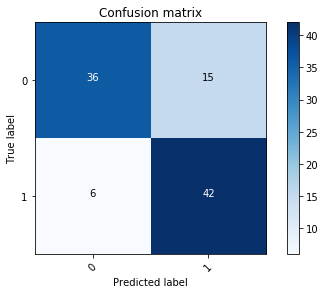

In [20]:
Ada = AdaBoostClassifier()
Ada.fit(x_train, y_train)
yhat = Ada.predict(x_test)
print("AdaBoostClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Ada.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

GradientBoostingClassifier
Train set Accuracy:  1.0
Test set Accuracy:  0.7777777777777778
Confusion matrix, without normalization
[[37 14]
 [ 8 40]]


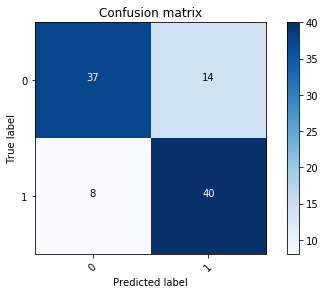

In [21]:
Gboost = GradientBoostingClassifier()
Gboost.fit(x_train, y_train)
yhat = Gboost.predict(x_test)
print("GradientBoostingClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Gboost.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

RandomForestClassifier
Train set Accuracy:  0.9847715736040609
Test set Accuracy:  0.8080808080808081
Confusion matrix, without normalization
[[38 13]
 [ 6 42]]


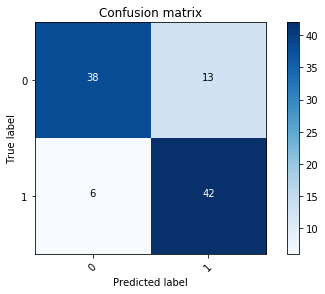

In [22]:
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
yhat = RForest.predict(x_test)
print("RandomForestClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RForest.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

DecisionTreeClassifier
Train set Accuracy:  0.8578680203045685
Test set Accuracy:  0.7777777777777778
Confusion matrix, without normalization
[[36 15]
 [ 7 41]]


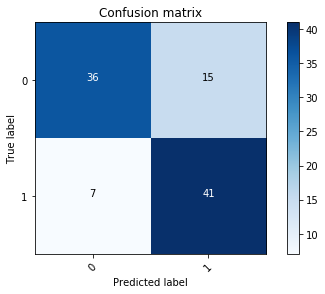

In [23]:
DTree = DecisionTreeClassifier(max_depth=3)
DTree.fit(x_train, y_train)
yhat = DTree.predict(x_test)
print("DecisionTreeClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DTree.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

ExtraTreeClassifier
Train set Accuracy:  0.7817258883248731
Test set Accuracy:  0.8080808080808081
Confusion matrix, without normalization
[[36 15]
 [ 4 44]]


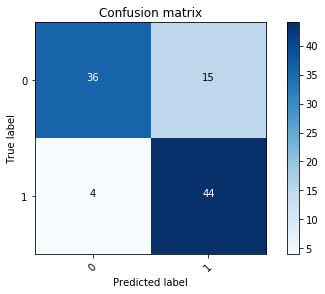

In [24]:
ETree = ExtraTreeClassifier(max_depth=3)
ETree.fit(x_train, y_train)
yhat = ETree.predict(x_test)
print("ExtraTreeClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, ETree.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

In [25]:
xgb = xgboost.XGBClassifier()

xgboost
Train set Accuracy:  0.9898477157360406
Test set Accuracy:  0.7878787878787878
Confusion matrix, without normalization
[[38 13]
 [ 8 40]]


C:\Users\0x6f736f646f\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\0x6f736f646f\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


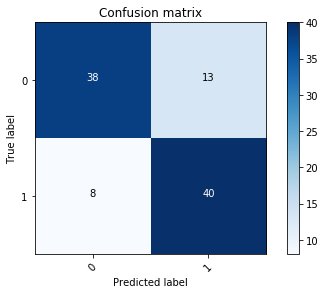

In [26]:
xgb.fit(x_train, y_train)
yhat = xgb.predict(x_test)
print("xgboost")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, xgb.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

# Hyperparamter optimization

In [28]:
import numpy as np

In [35]:
LR_params = {
    "penalty" : ["l1", "l2"],
    #"tol" : np.arange(0,1,0.0001),
    #"C" : np.arange(0,10,0.1),
    "random_state" : np.arange(0,100,1),
    #"solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "max_iter" :  np.arange(0,200,1)
}


In [36]:
LR_search = GridSearchCV(estimator=LR, param_grid=LR_params, cv=5)
LR_search.fit(x_train,y_train)
print(LR_search.best_params_)

{'max_iter': 1, 'penalty': 'l1', 'random_state': 21}


In [39]:
BNB_params = {
    #"alpha" : np.arange(0,100,1),
    "binarize" : np.arange(0,100,0.1)
}

In [40]:
Bernoulli_search = GridSearchCV(estimator=BNB, param_grid=BNB_params)
Bernoulli_search.fit(x_train,y_train)
print(Bernoulli_search.best_params_)

{'binarize': 0.8}


In [60]:
RForest_params = {
    "n_estimators" : np.arange(1,100,1),
    "criterion" : ["gini", "entropy"],
    "max_features" : ["auto", "sqrt", "log2"],
    "max_depth" : np.arange(1,10,1),
    #"min_samples_split" : np.arange(0,100,1),
    #"min_samples_leaf" : np.arange(0,100,1),
    #"min_weight_fraction_leaf" : np.arange(0,100,0.1),
    #"max_leaf_nodes" : np.arange(0,100,1),
    "random_state" : np.arange(1,100,1),
}


In [61]:
RForest_search = GridSearchCV(estimator=RForest, param_grid=RForest_params)
RForest_search.fit(x_train,y_train)
print(RForest_search.best_params_)

KeyboardInterrupt: 

In [ ]:
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
yhat = RForest.predict(x_test)
print("RandomForestClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RForest.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)